In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
from scipy.stats import gaussian_kde

In [2]:
dataset_path = Path("../150_35M")
# dataset_path = Path("../150_190000")
dataset_csv = {'train': dataset_path / "train_dataset.csv",
              'val': dataset_path / "val_dataset.csv",
              'test': dataset_path / "test_dataset.csv"}

df = {key: pd.read_csv(value) for key, value in dataset_csv.items()}
[(len(value)) for key, value in df.items()]

[2321, 59205, 74006]

In [3]:
x = 20
y = 20
matplotlib.rcParams['figure.figsize'] = [x*1.5, y*1.5]


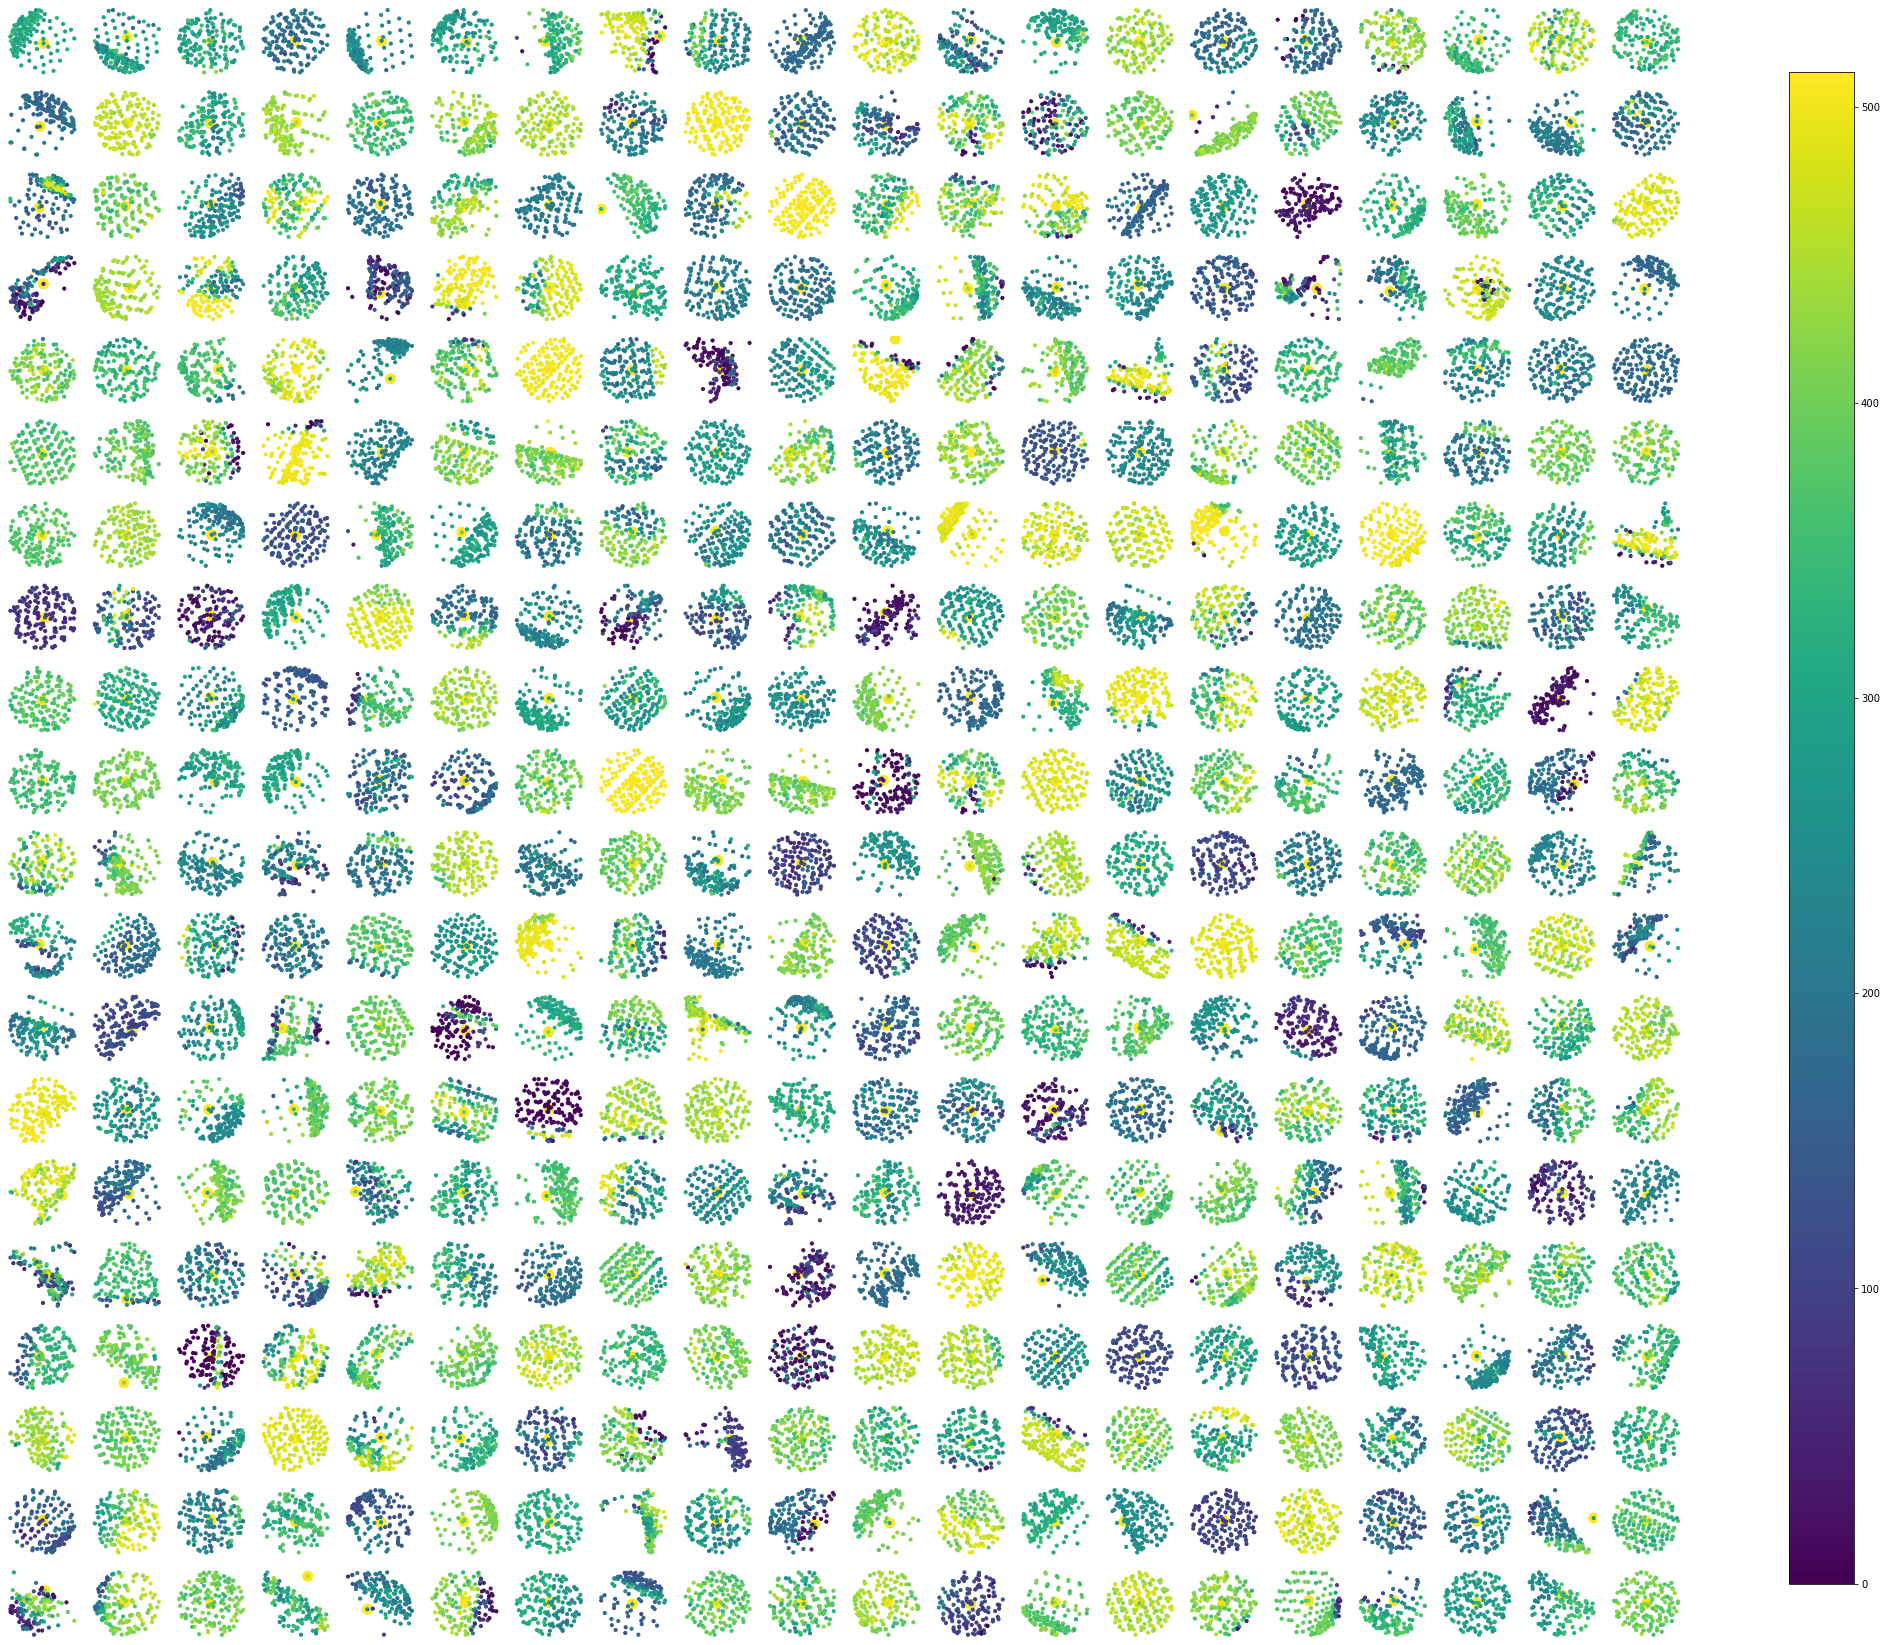

In [4]:
# Visualize Intenties
sample = np.random.choice(len(df['train']), (x, y))
fig, ax = plt.subplots(y, x)
for i in range(y):
    for j in range(x):
        example = np.load(df['train'].iloc[sample[j, i]][1])
        # Adjust the gt-center to be more visible
        center = np.ones((example.shape[0])) * 10
        center[0] = 100
        intensity = example[:, 3]
        intensity[0] = 512
        s = ax[i][j].scatter(example[:, 0], example[:, 1], s=center, c=example[:, 3], vmin=0, vmax=512)
        ax[i][j].axis('off')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()

train
(2321,)
val
(59205,)
test
(74006,)


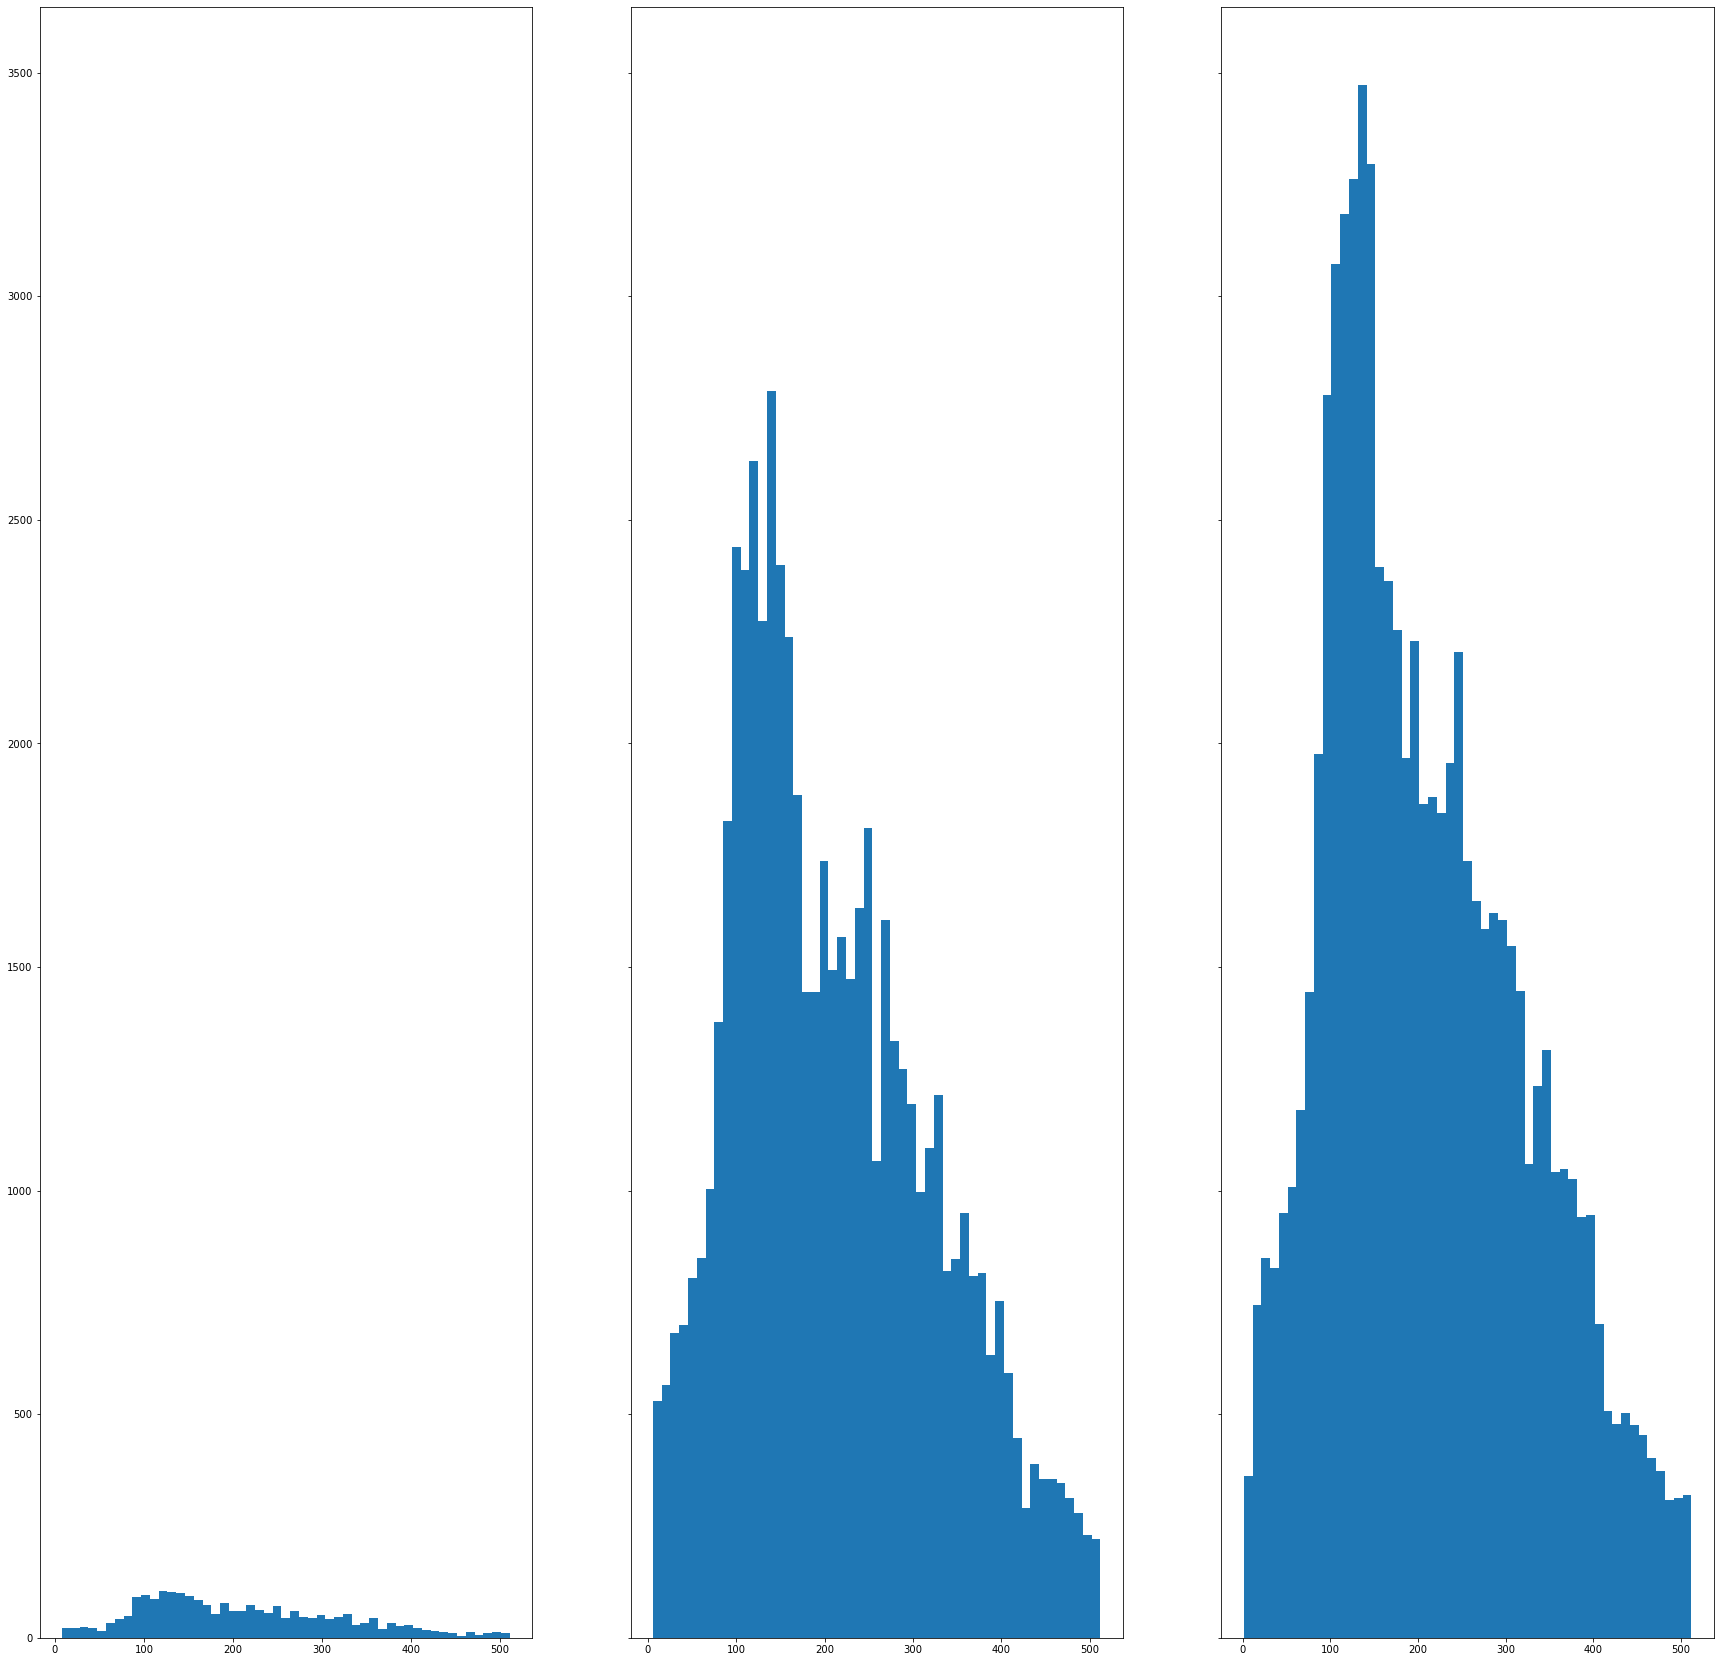

In [7]:
# Distribution of Intensities
intensities = {}
for key, value in df.items():
    print(key)
    curr_df = df[key]
    intensities[key] = []
    for i in range(len(curr_df)):
        ex = np.load(curr_df.iloc[i][1])
        intensities[key].append(ex[0, 3])
        
    intensities[key] = np.array(intensities[key])
    intensities[key] = intensities[key].flatten()
    print(intensities[key].shape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.hist(intensities['train'], 51)
ax2.hist(intensities['val'], 51)
ax3.hist(intensities['test'], 51)
plt.show()

# I'm not sure why there's such a huge spike at 510-515, perhaps this needs to be filtered.
# The training data doesn't seem as balanced as I would like. 

In [ ]:
# Visualize Scan Angle Rank 
fig, ax = plt.subplots(y, x)

# Scan Angle Rank Ranges by dataset:
# train: 32.0, -14.0
# val: 3, -18
# test: 26, 22 
# hmm...

for i in range(y):
    for j in range(x):
        example = np.load(df['train'].iloc[sample[j, i]][1])
        # Adjust the "center" to be more visible
        s = ax[i][j].scatter(example[:, 0], example[:, 1], s=10, c=abs(example[:, 4]), vmin=0, vmax=32)
        ax[i][j].axis('off')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()

# The middle point will be different since it comes from a different scan!

In [ ]:
# Visualize Flight Number 
fig, ax = plt.subplots(y, x)

# Scan Angle Rank Ranges by dataset:
# train: 32.0, -14.0
# val: 3, -18
# test: 26, 22 
# hmm...

for i in range(y):
    for j in range(x):
        example = np.load(df['train'].iloc[sample[j, i]][1])
        # Adjust the "center" to be more visible
        s = ax[i][j].scatter(example[:, 0], example[:, 1], s=10, c=abs(example[:, 8]), vmin=0, vmax=41)
        ax[i][j].axis('off')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()

# The middle point will be different since it comes from a different scan!

In [ ]:
# Balancing Examples by Flight Number (undersampled)
my_bins = df['train'].flight_num.unique()
my_bins.sort()
my_bins = np.concatenate((my_bins, np.array([40])))
my_bins = np.arange(41)
print(my_bins)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(df['train'].flight_num.values, my_bins)
ax2.hist(df['val'].flight_num.values, my_bins)
ax3.hist(df['test'].flight_num.values, my_bins)
plt.show()

In [ ]:
# Plots:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
my_bins2 = [i for i in range(0, 520, 10)]
print(my_bins)
print(my_bins2)
ax1.hist2d(scan_angle['train'], intensities['train'], bins=[my_bins, my_bins2])
ax2.hist2d(scan_angle['val'], intensities['val'], bins=[my_bins, my_bins2])
ax3.hist2d(scan_angle['test'], intensities['test'], bins=[my_bins, my_bins2])

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()